In [122]:
import numpy as np
import pandas as pd

# Data Preprocessing

In [123]:
df = pd.read_csv("6 class csv.csv")

In [124]:
df.shape

(240, 7)

In [125]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [126]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [127]:
df['Star type'].value_counts(), df['Spectral Class'].value_counts()

(0    40
 1    40
 2    40
 3    40
 4    40
 5    40
 Name: Star type, dtype: int64,
 M    111
 B     46
 O     40
 A     19
 F     17
 K      6
 G      1
 Name: Spectral Class, dtype: int64)

In [128]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Star color'] = label_encoder.fit_transform(df['Star color'])
df['Spectral Class'] = label_encoder.fit_transform(df['Spectral Class'])

In [97]:
features = df.drop(['Star type', 'Star color', 'Spectral Class'], axis = 1)
label = df['Star type']

# Visualizing Data

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

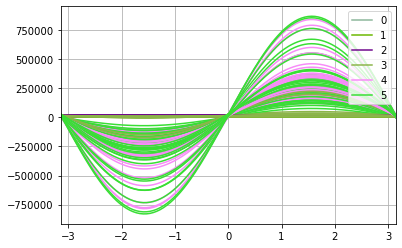

In [137]:
# very easy to spot outliers
pd.plotting.andrews_curves(df, class_column='Star type');

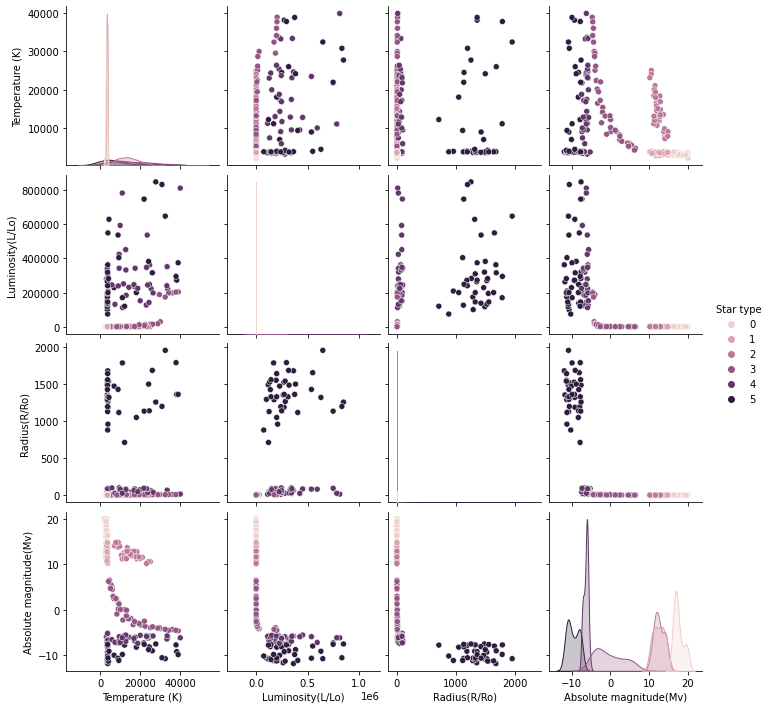

In [100]:
# plots features against each other
sns.pairplot(df, vars=features, hue='Star type');

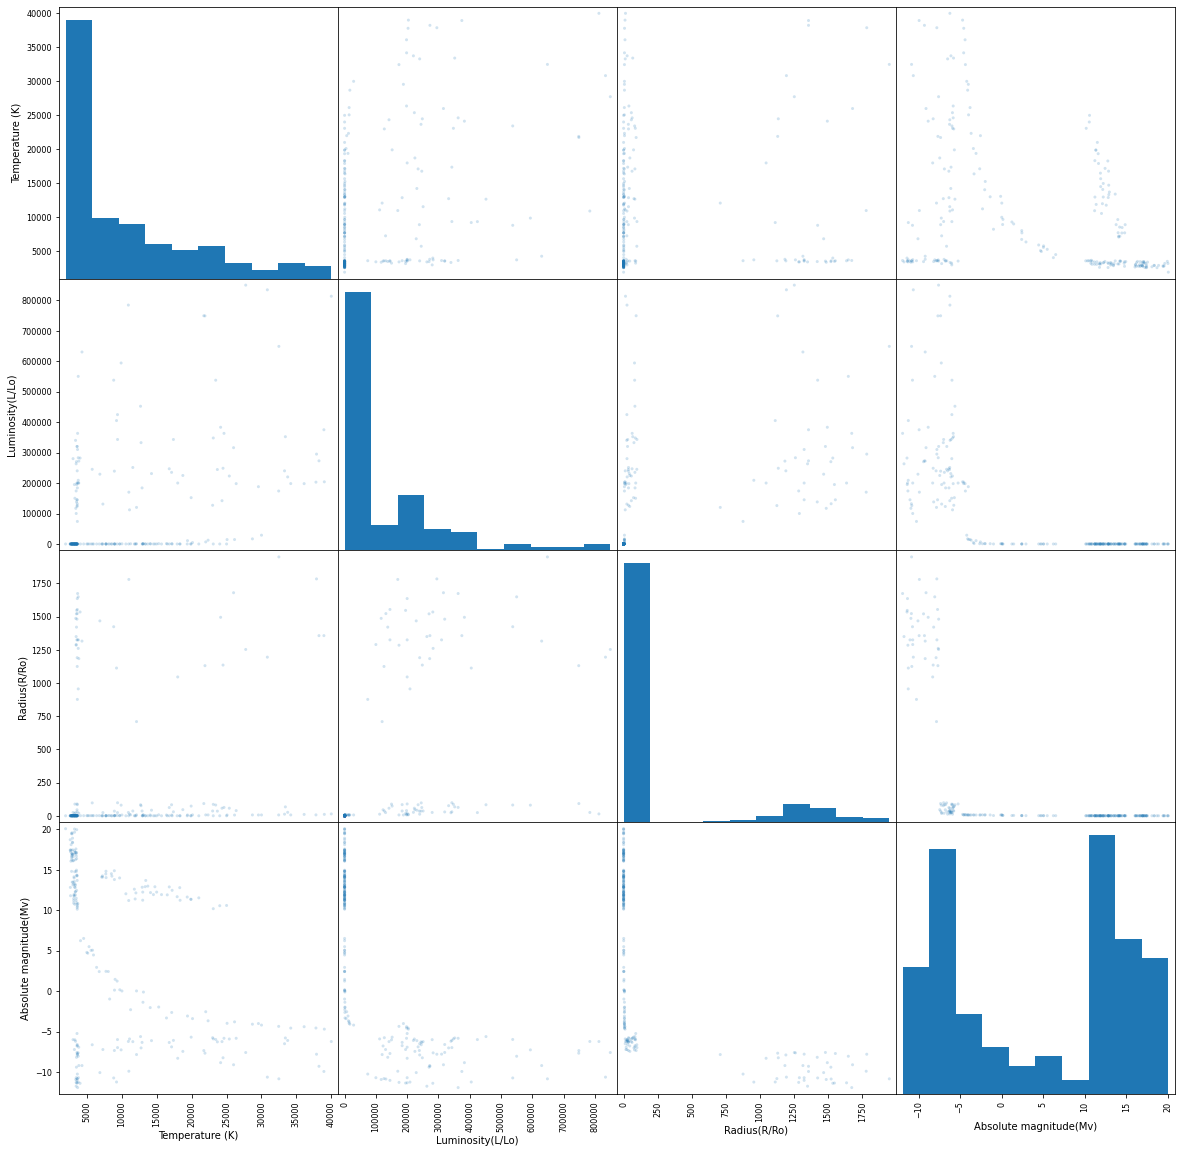

In [101]:
# plots each feature against each other
pd.plotting.scatter_matrix(features, alpha=0.2, figsize=(20.0, 20.0));

# Classification

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

Train Accuracy:  1.0
Test Score:  0.9791666666666666

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         7
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



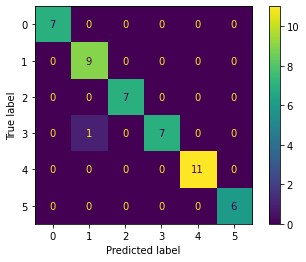

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print("Train Accuracy: ", train_score)
print("Test Score: ", test_score)

cm_report = classification_report(y_test, pred)
print('\n', cm_report)

ConfusionMatrixDisplay.from_predictions(y_test, pred)

Train Accuracy:  1.0
Test Score:  0.9791666666666666

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         7
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



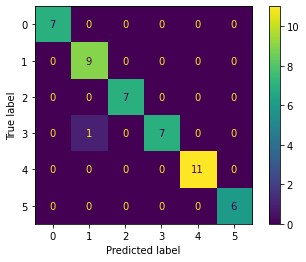

In [109]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

rng = range(0, 1)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print("Train Accuracy: ", train_score)
print("Test Score: ", test_score)

cm_report = classification_report(y_test, pred)
print('\n', cm_report)

ConfusionMatrixDisplay.from_predictions(y_test, pred)

Train Accuracy:  0.5520833333333334
Test Score:  0.4166666666666667

               precision    recall  f1-score   support

           0       0.44      1.00      0.61         7
           1       0.00      0.00      0.00         9
           2       0.47      1.00      0.64         7
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        11
           5       0.38      1.00      0.55         6

    accuracy                           0.42        48
   macro avg       0.21      0.50      0.30        48
weighted avg       0.18      0.42      0.25        48



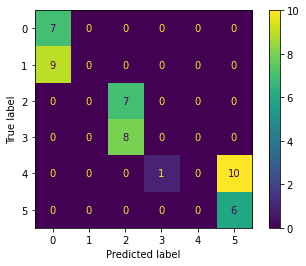

In [115]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

svm = SVC(random_state=0)
clf = OneVsRestClassifier(svm)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print("Train Accuracy: ", train_score)
print("Test Score: ", test_score)

cm_report = classification_report(y_test, pred, zero_division=0);
print('\n', cm_report)

ConfusionMatrixDisplay.from_predictions(y_test, pred);

Train Accuracy:  0.9947916666666666
Test Score:  0.9791666666666666

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         7
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48

Best params:  {'C': 1, 'kernel': 'linear'}


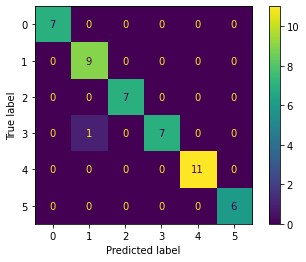

In [108]:
hyper_ = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'C':[0.01, 0.1, 1, 10]
}

svm = SVC(random_state=0)

clf = OneVsRestClassifier(svm)

gscv = GridSearchCV(svm, hyper_)

gscv.fit(X_train, y_train)

pred = gscv.predict(X_test)

train_score = gscv.score(X_train, y_train)
test_score = gscv.score(X_test, y_test)

print("Train Accuracy: ", train_score)
print("Test Score: ", test_score)

cm_report = classification_report(y_test, pred)
print('\n', cm_report)

ConfusionMatrixDisplay.from_predictions(y_test, pred)

best_params = gscv.best_params_
print("Best params: ", best_params)

In [116]:
param_names = ["C{}_{}".format(p['C'], p['kernel']) for p in gscv.cv_results_['params']]
param_names

['C0.01_linear',
 'C0.01_poly',
 'C0.01_rbf',
 'C0.01_sigmoid',
 'C0.1_linear',
 'C0.1_poly',
 'C0.1_rbf',
 'C0.1_sigmoid',
 'C1_linear',
 'C1_poly',
 'C1_rbf',
 'C1_sigmoid',
 'C10_linear',
 'C10_poly',
 'C10_rbf',
 'C10_sigmoid']

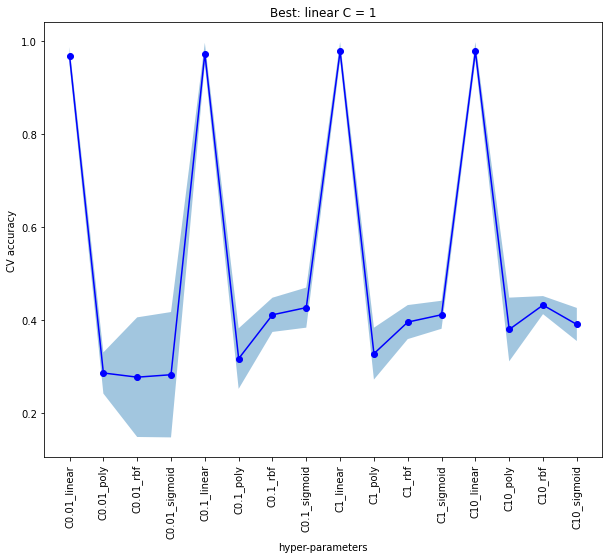

In [117]:
plt.figure(figsize=(10,8))
rng = range(len(param_names))

# TODO 15.1 - 15.2
plt.plot(gscv.cv_results_['mean_test_score'], 'bo-')
plt.fill_between(rng, gscv.cv_results_['mean_test_score'] - gscv.cv_results_['std_test_score'], gscv.cv_results_['mean_test_score'] + gscv.cv_results_['std_test_score'], alpha=150.0)

# xtick, x and y label and title
plt.xticks(rng, param_names, rotation=90)
plt.xlabel("hyper-parameters")
plt.ylabel("CV accuracy")
plt.title("Best: {} C = {}".format(
    gscv.best_params_['kernel'], gscv.best_params_['C']
));

In [138]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# using k-fold cross validation to partition dataset and test each partition
kf = KFold(n_splits=3)

tree = DecisionTreeClassifier()
clf = RandomForestClassifier()
svm = SVC(C=1, kernel='linear')
svm_ = OneVsRestClassifier(svm)

tree_score = cross_val_score(tree, X_train, y_train, cv=kf)
rt_score = cross_val_score(clf, X_train, y_train, cv=kf)
svm_score = cross_val_score(svm_, X_train, y_train, cv=kf)

print("Decision Tree: ", np.mean(tree_score))
print("Random Forest: ", np.mean(rt_score))
print("SVM: ", np.mean(svm_score))

Decision Tree:  0.9947916666666666
Random Forest:  0.9947916666666666
SVM:  0.8229166666666666
